In [ ]:
# 1. population.csv 파일을 DataFrame으로 읽고 내용 확인
# 2. 현재 연구자 거주지 동의 인구 정보 조회 ( 행전체 )

# -> "1,234,567" -> "1234567" -> 1234567

# 3. 총인구수가 가장 많은 동 조회 ( 읍면동 단위 )
# 4. 남성인구비가 가장 높은 동 조회 ( 읍면동 단위 )
# 5. 도시 법정동 1선정, 농촌 법정동 1선정, 인구 분포 비교 ( 읍면동 단위 )

In [1]:
import pandas as pd

In [2]:
population = pd.read_csv('data-files/population.csv')

C:\Users\human\AppData\Local\Temp\ipykernel_6436\804588561.py:1: DtypeWarning: Columns (100,101,103,198,199,200,201,305,306,307,309) have mixed types. Specify dtype option on import or set low_memory=False.
  population = pd.read_csv('data-files/population.csv')


In [3]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3910 entries, 0 to 3909
Columns: 310 entries, 행정구역 to 2024년09월_여_100세 이상
dtypes: int64(7), object(303)
memory usage: 9.2+ MB


In [4]:
population.head(3)

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
0,서울특별시 (1100000000),"9,350,995","9,350,995","38,100","38,486","40,625","42,608","44,377","47,757","51,072",...,"6,767","5,474","3,921","3,343","2,623","1,892","1,391",776,523,"1,184"
1,서울특별시 종로구 (1111000000),"138,879","138,879",415,419,467,471,516,512,580,...,131,105,87,63,52,46,34,21,8,33
2,서울특별시 종로구 청운효자동(1111051500),"11,143","11,143",52,35,43,48,46,50,50,...,13,10,11,3,6,4,1,2,0,4


In [14]:
# Series.str : Series에 포함된 문자열 각각에 적용할 함수를 포함하는 객체 (내장된 반복문 실행)
dong_filter = population['행정구역'].str.contains('동삭동')
population[dong_filter]

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
1527,경기도 평택시 동삭동(4122065000),"42,024","42,024",527,527,507,492,517,538,568,...,8,6,8,2,2,1,1,2,1,0


In [23]:
# "1,234,567" -> "1234567" -> 1234567

print ( population["2024년09월_계_총인구수"].dtype )

population["2024년09월_계_총인구수"] = \
    population["2024년09월_계_총인구수"].map(lambda v : int(str(v).replace(",", "")))

int64


In [21]:
population["2024년09월_계_총인구수"].dtype

dtype('int64')

In [24]:
population["행정구역"]

0                서울특별시  (1100000000)
1             서울특별시 종로구 (1111000000)
2        서울특별시 종로구 청운효자동(1111051500)
3          서울특별시 종로구 사직동(1111053000)
4          서울특별시 종로구 삼청동(1111054000)
                    ...             
3905    제주특별자치도 서귀포시 서홍동(5013058000)
3906    제주특별자치도 서귀포시 대륜동(5013059000)
3907    제주특별자치도 서귀포시 대천동(5013060000)
3908    제주특별자치도 서귀포시 중문동(5013061000)
3909    제주특별자치도 서귀포시 예래동(5013062000)
Name: 행정구역, Length: 3910, dtype: object

In [27]:
area_mask = population['행정구역'].map(lambda v: v[-6] != '0') # 동 행정구역 찾기
max_value = population[area_mask]["2024년09월_계_총인구수"].max()
max_value

population[ population["2024년09월_계_총인구수"] == max_value ]


,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
3715,경상남도 양산시 물금읍(4833025300),117160,"117,160",643,739,845,882,"1,114","1,169","1,403",...,46,42,31,18,24,12,4,5,4,9


In [37]:
import pandas as pd

In [42]:
da = pd.read_csv('source/population.csv')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_3840\2519493268.py:1: DtypeWarning: Columns (100,101,103,198,199,200,201,305,306,307,309) have mixed types. Specify dtype option on import or set low_memory=False.
  da = pd.read_csv('source/population.csv')


In [43]:
dc = da

In [8]:
db = da.loc[:, ["행정구역", "2024년09월_계_총인구수", "2024년09월_남_총인구수", "2024년09월_여_총인구수"]]

In [9]:
db.head()

,행정구역,2024년09월_계_총인구수,2024년09월_남_총인구수,2024년09월_여_총인구수
0,서울특별시 (1100000000),"9,350,995","4,515,791","4,835,204"
1,서울특별시 종로구 (1111000000),"138,879","66,846","72,033"
2,서울특별시 종로구 청운효자동(1111051500),"11,143","5,079","6,064"
3,서울특별시 종로구 사직동(1111053000),"8,995","3,948","5,047"
4,서울특별시 종로구 삼청동(1111054000),"2,234","1,073","1,161"


In [12]:
db.iloc[:,1:] = db.iloc[:,1:].map(lambda v : int(str(v).replace(",", "")))

In [13]:
db.head()

,행정구역,2024년09월_계_총인구수,2024년09월_남_총인구수,2024년09월_여_총인구수
0,서울특별시 (1100000000),9350995,4515791,4835204
1,서울특별시 종로구 (1111000000),138879,66846,72033
2,서울특별시 종로구 청운효자동(1111051500),11143,5079,6064
3,서울특별시 종로구 사직동(1111053000),8995,3948,5047
4,서울특별시 종로구 삼청동(1111054000),2234,1073,1161


In [27]:
help(db.sort_values)

Help on method sort_values in module pandas.core.frame:

sort_values(by: 'IndexLabel', *, axis: 'Axis' = 0, ascending: 'bool | list[bool] | tuple[bool, ...]' = True, inplace: 'bool' = False, kind: 'SortKind' = 'quicksort', na_position: 'str' = 'last', ignore_index: 'bool' = False, key: 'ValueKeyFunc | None' = None) -> 'DataFrame | None' method of pandas.core.frame.DataFrame instance
    Sort by the values along either axis.

    Parameters
    ----------
    by : str or list of str
        Name or list of names to sort by.

        - if `axis` is 0 or `'index'` then `by` may contain index
          levels and/or column labels.
        - if `axis` is 1 or `'columns'` then `by` may contain column
          levels and/or index labels.
    axis : "{0 or 'index', 1 or 'columns'}", default 0
         Axis to be sorted.
    ascending : bool or list of bool, default True
         Sort ascending vs. descending. Specify list for multiple sort
         orders.  If this is a list of bools, must ma

In [29]:
db.sort_values("2024년09월_계_총인구수", ascending=0).reset_index(drop=True)

,행정구역,2024년09월_계_총인구수,2024년09월_남_총인구수,2024년09월_여_총인구수
0,경기도 (4100000000),13680645,6877300,6803345
1,서울특별시 (1100000000),9350995,4515791,4835204
2,부산광역시 (2600000000),3273473,1593783,1679690
3,경상남도 (4800000000),3232297,1628643,1603654
4,인천광역시 (2800000000),3016520,1507439,1509081
...,...,...,...,...
3905,동해출장소 (5110500000),0,0,0
3906,경상남도 사천남양출장소 (4824500000),0,0,0
3907,인천광역시 서구검단출장소 (2826500000),0,0,0
3908,인천광역시 중구영종출장소 (2811400000),0,0,0


In [19]:
db.loc[db["2024년09월_계_총인구수"] == db["2024년09월_계_총인구수"].max()]

,행정구역,2024년09월_계_총인구수,2024년09월_남_총인구수,2024년09월_여_총인구수
1287,경기도 (4100000000),13680645,6877300,6803345


In [21]:
area_mask = db['행정구역'].map(lambda v: v[-6] != '0') # 동 행정구역 찾기
max_value = db[area_mask]["2024년09월_계_총인구수"].max()
max_value

db[ db["2024년09월_계_총인구수"] == max_value ]

,행정구역,2024년09월_계_총인구수,2024년09월_남_총인구수,2024년09월_여_총인구수
3715,경상남도 양산시 물금읍(4833025300),117160,57868,59292


In [23]:
area_mask = db['행정구역'].map(lambda v: v[-6] != '0') # 동 행정구역 찾기
max_value = db[area_mask]["2024년09월_남_총인구수"].max()
max_value

db[db["2024년09월_남_총인구수"] == max_value ]

,행정구역,2024년09월_계_총인구수,2024년09월_남_총인구수,2024년09월_여_총인구수
3715,경상남도 양산시 물금읍(4833025300),117160,57868,59292


In [44]:
dc.head(1)

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
0,서울특별시 (1100000000),"9,350,995","9,350,995","38,100","38,486","40,625","42,608","44,377","47,757","51,072",...,"6,767","5,474","3,921","3,343","2,623","1,892","1,391",776,523,"1,184"


In [45]:
def value_to_int(v):
    if not v or str(v) == 'nan':
        return 0
    
    str_v = str(v)
    replaced_v = str_v.replace(",", "")
    int_v = int(replaced_v)
    
    return int_v


for column in da.columns[1:]:
    # print(column)
    # dc = da[column].map(lambda v : int(str(v).replace(",", "")))
     dc[column] = da[column].map(lambda v : int(str(v).replace(",", "")) if v and str(v) != "nan" else 0)
    # da[column] = da[column].map(value_to_int)

In [46]:
dc.head()

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
0,서울특별시 (1100000000),9350995,9350995,38100,38486,40625,42608,44377,47757,51072,...,6767,5474,3921,3343,2623,1892,1391,776,523,1184
1,서울특별시 종로구 (1111000000),138879,138879,415,419,467,471,516,512,580,...,131,105,87,63,52,46,34,21,8,33
2,서울특별시 종로구 청운효자동(1111051500),11143,11143,52,35,43,48,46,50,50,...,13,10,11,3,6,4,1,2,0,4
3,서울특별시 종로구 사직동(1111053000),8995,8995,21,31,38,33,35,38,54,...,8,3,10,7,5,3,2,1,1,3
4,서울특별시 종로구 삼청동(1111054000),2234,2234,3,8,6,8,4,4,10,...,6,2,1,4,0,1,0,0,0,1


In [49]:
male_ratio = dc["2024년09월_남_총인구수"] / dc["2024년09월_계_총인구수"]
print(male_ratio.argmax())
# population.loc[male_ratio.argmax()]

1765


In [53]:
print(dc.loc[male_ratio.argmax()])
print(male_ratio.max(), male_ratio.min())

행정구역                  경기도 파주시 월롱면(4148031000)
2024년09월_계_총인구수                          8366
2024년09월_계_연령구간인구수                       8366
2024년09월_계_0세                               9
2024년09월_계_1세                               7
                               ...           
2024년09월_여_96세                              3
2024년09월_여_97세                              1
2024년09월_여_98세                              3
2024년09월_여_99세                              0
2024년09월_여_100세 이상                          2
Name: 1765, Length: 310, dtype: object
0.6537174276834807 0.4086599031894437


In [54]:
dc.head()

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
0,서울특별시 (1100000000),9350995,9350995,38100,38486,40625,42608,44377,47757,51072,...,6767,5474,3921,3343,2623,1892,1391,776,523,1184
1,서울특별시 종로구 (1111000000),138879,138879,415,419,467,471,516,512,580,...,131,105,87,63,52,46,34,21,8,33
2,서울특별시 종로구 청운효자동(1111051500),11143,11143,52,35,43,48,46,50,50,...,13,10,11,3,6,4,1,2,0,4
3,서울특별시 종로구 사직동(1111053000),8995,8995,21,31,38,33,35,38,54,...,8,3,10,7,5,3,2,1,1,3
4,서울특별시 종로구 삼청동(1111054000),2234,2234,3,8,6,8,4,4,10,...,6,2,1,4,0,1,0,0,0,1


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [68]:
dd = dc.loc[dc["행정구역"].str.contains("해남읍") | dc['행정구역'].str.contains("경기도 오산시 중앙동")]

In [72]:
dc.loc[dc['행정구역'].str.contains("해남")]

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
3043,전라남도 해남군 (4682000000),63457,63457,204,241,217,249,258,279,298,...,153,135,111,91,52,39,28,17,8,24
3044,전라남도 해남군 해남읍(4682025000),23508,23508,107,136,128,141,163,179,193,...,27,24,15,13,11,7,10,3,0,3
3045,전라남도 해남군 삼산면(4682031000),2734,2734,6,5,6,7,4,5,3,...,6,3,12,6,1,1,2,0,0,3
3046,전라남도 해남군 화산면(4682032000),2934,2934,11,7,11,3,7,8,7,...,9,7,5,3,4,0,0,1,2,0
3047,전라남도 해남군 현산면(4682033000),2623,2623,5,5,6,1,5,6,6,...,11,8,3,6,5,3,2,2,1,4
3048,전라남도 해남군 송지면(4682034000),5577,5577,18,15,13,19,21,21,21,...,18,16,8,9,3,3,4,3,0,1
3049,전라남도 해남군 북평면(4682035000),2541,2541,1,4,2,6,5,5,5,...,9,8,3,3,4,1,1,0,1,0
3050,전라남도 해남군 북일면(4682036000),1896,1896,5,0,0,3,6,5,8,...,8,6,7,5,3,3,4,0,1,1
3051,전라남도 해남군 옥천면(4682037000),2812,2812,7,4,5,4,5,6,7,...,11,6,5,6,4,4,3,1,0,5
3052,전라남도 해남군 계곡면(4682038000),2042,2042,5,11,6,5,2,6,3,...,10,8,7,5,1,2,0,2,0,3


In [71]:
dc.loc[dc['행정구역'].str.contains("경기도 오산시")]

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
1653,경기도 오산시 (4137000000),238788,238788,1213,1338,1479,1547,1631,1805,1992,...,110,87,53,63,35,28,30,17,12,14
1654,경기도 오산시 중앙동(4137051000),33816,33816,174,166,218,247,230,291,285,...,12,10,5,9,4,7,5,3,2,1
1655,경기도 오산시 대원1동(4137052300),45780,45780,194,182,201,203,212,242,306,...,13,14,14,10,10,7,7,3,4,2
1656,경기도 오산시 대원2동(4137052600),24421,24421,201,240,229,231,252,243,248,...,8,6,2,3,2,1,0,3,1,1
1657,경기도 오산시 남촌동(4137053000),25499,25499,139,139,161,188,186,173,187,...,8,9,7,6,3,1,2,1,0,2
1658,경기도 오산시 신장1동(4137054300),35231,35231,128,125,162,169,201,241,285,...,24,17,8,13,7,2,4,1,1,2
1659,경기도 오산시 신장2동(4137054600),22979,22979,90,107,137,144,161,189,233,...,15,11,8,5,1,3,5,2,2,2
1660,경기도 오산시 세마동(4137055000),31587,31587,188,253,243,250,251,292,328,...,22,13,6,13,3,5,4,3,2,3
1661,경기도 오산시 초평동(4137056000),19475,19475,99,126,128,115,138,134,120,...,8,7,3,4,5,2,3,1,0,1


In [81]:
dd2 = dd.iloc[:, :104]

In [82]:
dd2.head()

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_계_91세,2024년09월_계_92세,2024년09월_계_93세,2024년09월_계_94세,2024년09월_계_95세,2024년09월_계_96세,2024년09월_계_97세,2024년09월_계_98세,2024년09월_계_99세,2024년09월_계_100세 이상
1654,경기도 오산시 중앙동(4137051000),33816,33816,174,166,218,247,230,291,285,...,19,13,6,12,7,9,5,3,2,1
3044,전라남도 해남군 해남읍(4682025000),23508,23508,107,136,128,141,163,179,193,...,38,29,17,15,17,10,10,5,0,4


In [99]:
dd3 = dd2.drop(columns = ['2024년09월_계_총인구수', '2024년09월_계_연령구간인구수'])

In [100]:
dd3.head()

,행정구역,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,2024년09월_계_7세,2024년09월_계_8세,...,2024년09월_계_91세,2024년09월_계_92세,2024년09월_계_93세,2024년09월_계_94세,2024년09월_계_95세,2024년09월_계_96세,2024년09월_계_97세,2024년09월_계_98세,2024년09월_계_99세,2024년09월_계_100세 이상
1654,경기도 오산시 중앙동(4137051000),174,166,218,247,230,291,285,309,382,...,19,13,6,12,7,9,5,3,2,1
3044,전라남도 해남군 해남읍(4682025000),107,136,128,141,163,179,193,204,200,...,38,29,17,15,17,10,10,5,0,4


In [101]:
new_columns = ['행정구역'] + [str(i) for i in range(101)]

In [102]:
dd3.columns = new_columns

In [103]:
dd3.head()

,행정구역,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
1654,경기도 오산시 중앙동(4137051000),174,166,218,247,230,291,285,309,382,...,19,13,6,12,7,9,5,3,2,1
3044,전라남도 해남군 해남읍(4682025000),107,136,128,141,163,179,193,204,200,...,38,29,17,15,17,10,10,5,0,4


In [104]:
dd3 = dd3.reset_index(drop=True)

In [105]:
dd3.head()

,행정구역,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,경기도 오산시 중앙동(4137051000),174,166,218,247,230,291,285,309,382,...,19,13,6,12,7,9,5,3,2,1
1,전라남도 해남군 해남읍(4682025000),107,136,128,141,163,179,193,204,200,...,38,29,17,15,17,10,10,5,0,4


In [106]:
dd3

,행정구역,0,1,2,3,4,5,6,7,8,...,91,92,93,94,95,96,97,98,99,100
0,경기도 오산시 중앙동(4137051000),174,166,218,247,230,291,285,309,382,...,19,13,6,12,7,9,5,3,2,1
1,전라남도 해남군 해남읍(4682025000),107,136,128,141,163,179,193,204,200,...,38,29,17,15,17,10,10,5,0,4


In [116]:
dd4 = dd3.transpose()

In [117]:
dd4

,0,1
행정구역,경기도 오산시 중앙동(4137051000),전라남도 해남군 해남읍(4682025000)
0,174,107
1,166,136
2,218,128
3,247,141
...,...,...
96,9,10
97,5,10
98,3,5
99,2,0


In [ ]:
sns.catplot(x="행정구역", y ="경기도 오산시 중앙동(4137051000)", data = dd3 )

In [121]:
dd4.columns = ['OJ', 'HH']

In [122]:
dd4

,OJ,HH
행정구역,경기도 오산시 중앙동(4137051000),전라남도 해남군 해남읍(4682025000)
0,174,107
1,166,136
2,218,128
3,247,141
...,...,...
96,9,10
97,5,10
98,3,5
99,2,0


In [124]:
dd4 = dd4.drop(index='행정구역')

In [132]:
dd42 = dd4.reset_index()
dd42

,index,OJ,HH
0,0,174,107
1,1,166,136
2,2,218,128
3,3,247,141
4,4,230,163
...,...,...,...
96,96,9,10
97,97,5,10
98,98,3,5
99,99,2,0


In [135]:
# dd42.rename({'index':'age'})
dd42.columns = ['age', 'oj', 'hh']
dd42

,age,oj,hh
0,0,174,107
1,1,166,136
2,2,218,128
3,3,247,141
4,4,230,163
...,...,...,...
96,96,9,10
97,97,5,10
98,98,3,5
99,99,2,0


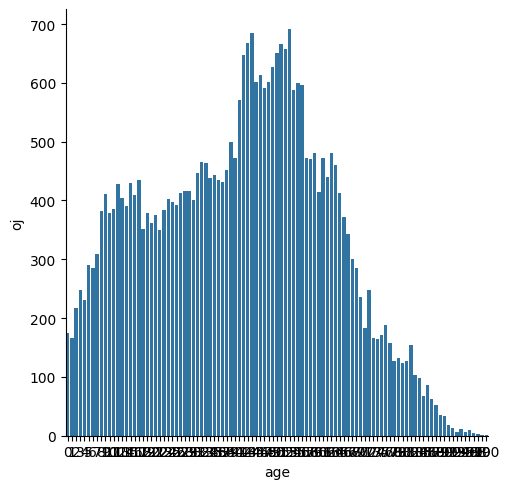

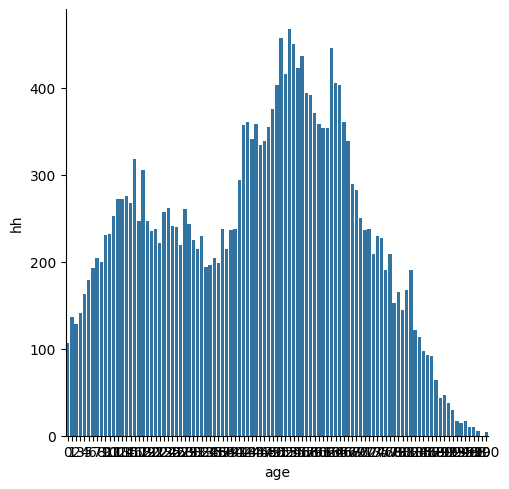

In [138]:
sns.catplot(x = "age", y = "oj", kind = "bar", data = dd42)
sns.catplot(x = "age", y = "hh", kind = "bar", data = dd42)

In [145]:
dd42.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     101 non-null    object
 1   oj      101 non-null    object
 2   hh      101 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB


Text(0.5, 0, 'Age')

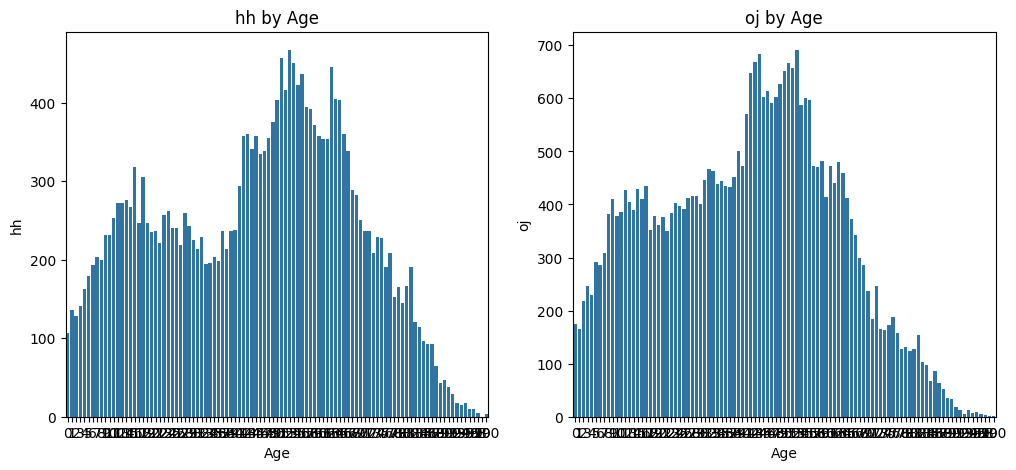

In [146]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 첫 번째 그래프: hh
sns.barplot(x='age', y='hh', data=dd42, ax=ax[0])
ax[0].set_title('hh by Age')
ax[0].set_ylabel('hh')
ax[0].set_xlabel('Age')

# 두 번째 그래프: oj
sns.barplot(x='age', y='oj', data=dd42, ax=ax[1])
ax[1].set_title('oj by Age')
ax[1].set_ylabel('oj')
ax[1].set_xlabel('Age')

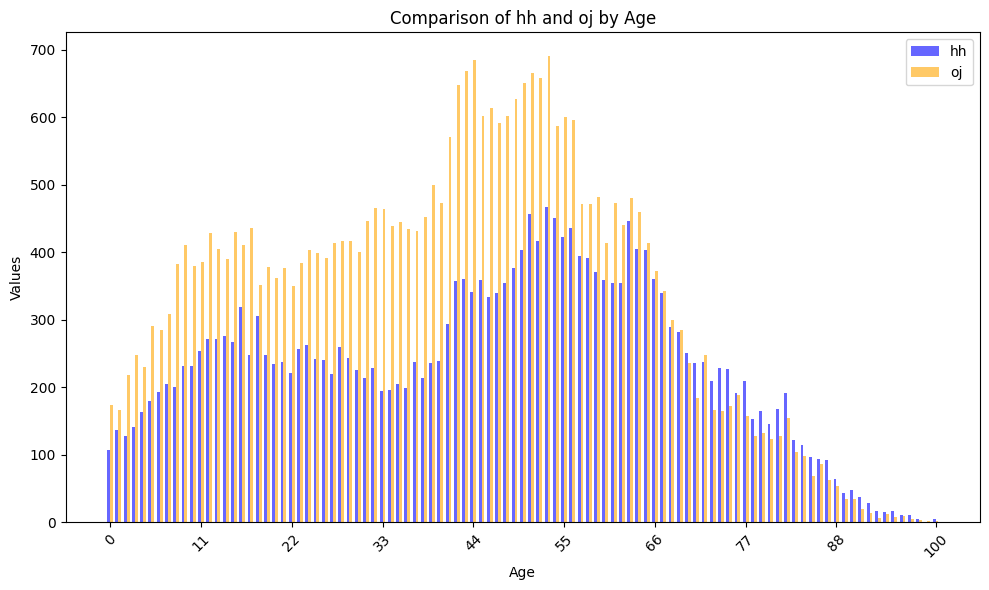

In [155]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
age = dd42['age']
hh = dd42['hh'].astype(float)  # 'hh'를 float으로 변환
oj = dd42['oj'].astype(float)  # 'oj'를 float으로 변환

# 기본 figure 생성
fig, ax = plt.subplots(figsize=(10, 6))

# 막대 그래프 위치 설정
x = np.arange(len(age))  # x축 위치
width = 0.35  # 막대 너비

# 두 개의 그래프: hh와 oj
bars1 = ax.bar(x - width/2, hh, width, label='hh', color='blue', alpha=0.6)  # hh 데이터
bars2 = ax.bar(x + width/2, oj, width, label='oj', color='orange', alpha=0.6)  # oj 데이터

# y축 레이블 설정
ax.set_ylabel('Values')
ax.set_xlabel('Age')

# x축 틱 설정 (10개로 제한)
num_ticks = 10
tick_indices = np.linspace(0, len(age) - 1, num_ticks, dtype=int)  # 10개의 인덱스 생성
ax.set_xticks(tick_indices)  # x축 눈금 설정
ax.set_xticklabels(age[tick_indices], rotation=45)  # 눈금 레이블 설정 및 회전

# 그래프 제목 설정
plt.title('Comparison of hh and oj by Age')

# 범례 추가
ax.legend()

# 그래프 보여주기
plt.tight_layout()
plt.show()


<BarContainer object of 101 artists>

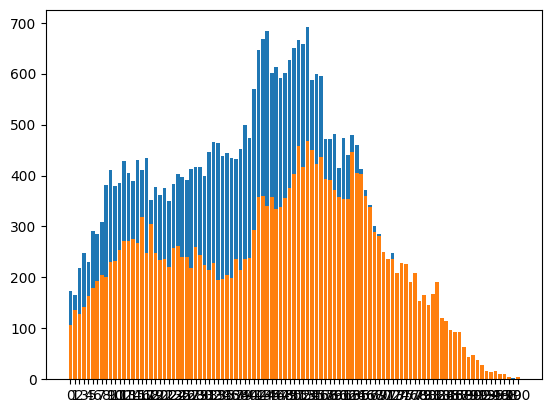

In [159]:
plt.bar(dd42['age'],dd42['oj'])
plt.bar(dd42['age'],dd42['hh'])

In [160]:
population_per_age_ratio392 = dd42['oj'] / dd42['oj'].sum() * 100
population_per_age_ratio2942 = dd42['hh'] / dd42['hh'].sum() * 100

In [166]:
dd42['oj'] / dd42['oj'].sum() * 100

0      0.514549
1      0.490892
2      0.644665
3      0.730423
4      0.680151
         ...   
96     0.026615
97     0.014786
98     0.008872
99     0.005914
100    0.002957
Name: oj, Length: 101, dtype: object

In [165]:
dd42['oj']

0      174
1      166
2      218
3      247
4      230
      ... 
96       9
97       5
98       3
99       2
100      1
Name: oj, Length: 101, dtype: object

In [164]:
dd42['oj'].sum()

33816

<BarContainer object of 101 artists>

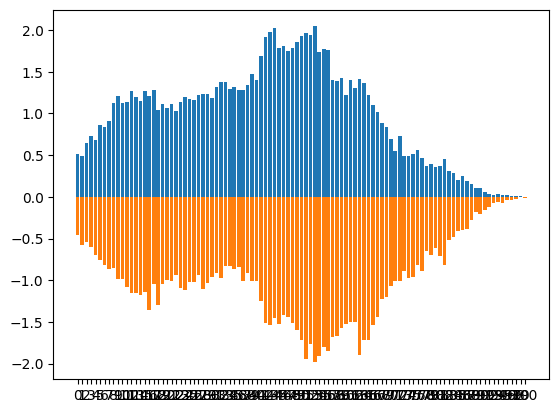

In [162]:
plt.bar(dd42['age'],population_per_age_ratio392)
plt.bar(dd42['age'],- population_per_age_ratio2942)

In [193]:
db = da

In [194]:
db.head()

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
0,서울특별시 (1100000000),9350995,9350995,38100,38486,40625,42608,44377,47757,51072,...,6767,5474,3921,3343,2623,1892,1391,776,523,1184
1,서울특별시 종로구 (1111000000),138879,138879,415,419,467,471,516,512,580,...,131,105,87,63,52,46,34,21,8,33
2,서울특별시 종로구 청운효자동(1111051500),11143,11143,52,35,43,48,46,50,50,...,13,10,11,3,6,4,1,2,0,4
3,서울특별시 종로구 사직동(1111053000),8995,8995,21,31,38,33,35,38,54,...,8,3,10,7,5,3,2,1,1,3
4,서울특별시 종로구 삼청동(1111054000),2234,2234,3,8,6,8,4,4,10,...,6,2,1,4,0,1,0,0,0,1


In [169]:
db['행정구역'].str.contains('오산시')

0       False
1       False
2       False
3       False
4       False
        ...  
3905    False
3906    False
3907    False
3908    False
3909    False
Name: 행정구역, Length: 3910, dtype: bool

In [195]:
db.loc[db['행정구역'].str.contains('오산시')]

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_여_91세,2024년09월_여_92세,2024년09월_여_93세,2024년09월_여_94세,2024년09월_여_95세,2024년09월_여_96세,2024년09월_여_97세,2024년09월_여_98세,2024년09월_여_99세,2024년09월_여_100세 이상
1653,경기도 오산시 (4137000000),238788,238788,1213,1338,1479,1547,1631,1805,1992,...,110,87,53,63,35,28,30,17,12,14
1654,경기도 오산시 중앙동(4137051000),33816,33816,174,166,218,247,230,291,285,...,12,10,5,9,4,7,5,3,2,1
1655,경기도 오산시 대원1동(4137052300),45780,45780,194,182,201,203,212,242,306,...,13,14,14,10,10,7,7,3,4,2
1656,경기도 오산시 대원2동(4137052600),24421,24421,201,240,229,231,252,243,248,...,8,6,2,3,2,1,0,3,1,1
1657,경기도 오산시 남촌동(4137053000),25499,25499,139,139,161,188,186,173,187,...,8,9,7,6,3,1,2,1,0,2
1658,경기도 오산시 신장1동(4137054300),35231,35231,128,125,162,169,201,241,285,...,24,17,8,13,7,2,4,1,1,2
1659,경기도 오산시 신장2동(4137054600),22979,22979,90,107,137,144,161,189,233,...,15,11,8,5,1,3,5,2,2,2
1660,경기도 오산시 세마동(4137055000),31587,31587,188,253,243,250,251,292,328,...,22,13,6,13,3,5,4,3,2,3
1661,경기도 오산시 초평동(4137056000),19475,19475,99,126,128,115,138,134,120,...,8,7,3,4,5,2,3,1,0,1


In [197]:
db2 = db.iloc[:,:104]

In [198]:
db2

,행정구역,2024년09월_계_총인구수,2024년09월_계_연령구간인구수,2024년09월_계_0세,2024년09월_계_1세,2024년09월_계_2세,2024년09월_계_3세,2024년09월_계_4세,2024년09월_계_5세,2024년09월_계_6세,...,2024년09월_계_91세,2024년09월_계_92세,2024년09월_계_93세,2024년09월_계_94세,2024년09월_계_95세,2024년09월_계_96세,2024년09월_계_97세,2024년09월_계_98세,2024년09월_계_99세,2024년09월_계_100세 이상
0,서울특별시 (1100000000),9350995,9350995,38100,38486,40625,42608,44377,47757,51072,...,9544,7588,5219,4339,3525,2463,1745,953,638,1528
1,서울특별시 종로구 (1111000000),138879,138879,415,419,467,471,516,512,580,...,207,164,126,84,76,57,45,28,13,46
2,서울특별시 종로구 청운효자동(1111051500),11143,11143,52,35,43,48,46,50,50,...,19,14,13,5,7,4,3,2,1,6
3,서울특별시 종로구 사직동(1111053000),8995,8995,21,31,38,33,35,38,54,...,17,8,13,8,10,6,3,2,1,7
4,서울특별시 종로구 삼청동(1111054000),2234,2234,3,8,6,8,4,4,10,...,7,6,3,5,1,2,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3905,제주특별자치도 서귀포시 서홍동(5013058000),11111,11111,75,70,86,85,91,102,112,...,13,11,8,6,4,5,0,2,0,2
3906,제주특별자치도 서귀포시 대륜동(5013059000),15106,15106,81,95,125,119,139,131,132,...,28,12,8,12,8,7,4,1,1,6
3907,제주특별자치도 서귀포시 대천동(5013060000),13755,13755,78,98,119,106,120,128,142,...,15,11,5,10,1,3,6,1,0,1
3908,제주특별자치도 서귀포시 중문동(5013061000),12285,12285,48,67,80,68,91,98,89,...,18,14,11,10,8,5,3,3,1,2
